 VIDEO GAME SALES PROJECT

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv(r"C:\Users\LENOVO\Desktop\Video Games Sales.csv")

In [6]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
df.shape

(16598, 11)

In [9]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [11]:
df.values

array([[1, 'Wii Sports', 'Wii', ..., 3.77, 8.46, 82.74],
       [2, 'Super Mario Bros.', 'NES', ..., 6.81, 0.77, 40.24],
       [3, 'Mario Kart Wii', 'Wii', ..., 3.79, 3.31, 35.82],
       ...,
       [16598, 'SCORE International Baja 1000: The Official Game', 'PS2',
        ..., 0.0, 0.0, 0.01],
       [16599, 'Know How 2', 'DS', ..., 0.0, 0.0, 0.01],
       [16600, 'Spirits & Spells', 'GBA', ..., 0.0, 0.0, 0.01]],
      dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [15]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [16]:
df.count()

Rank            16598
Name            16598
Platform        16598
Year            16327
Genre           16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

In [36]:
df.fillna(0,inplace=True)

In [37]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [53]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

most_sales_year = yearly_sales.idxmax()
total_sales = yearly_sales.max()

print("Year with the most sales:", most_sales_year)
print("Total sales in that year:", total_sales)


Year with the most sales: 2008.0
Total sales in that year: 678.9


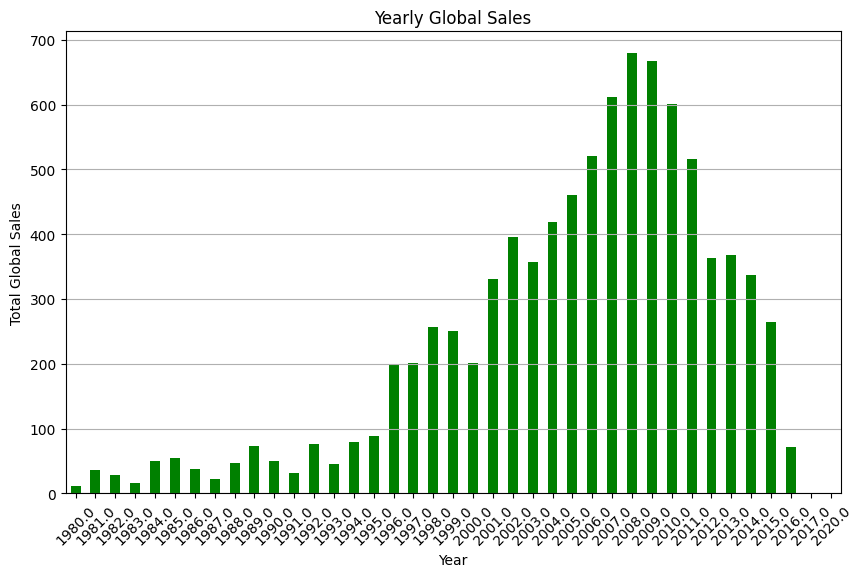

In [54]:
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='green')
plt.xlabel('Year')
plt.ylabel('Total Global Sales')
plt.title('Yearly Global Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y')  # Add grid lines only on y-axis
plt.show()


In [57]:
games =df.groupby('Genre')['Name'].nunique()
games


Genre
Action          1925
Adventure       1048
Fighting         612
Misc            1327
Platform         589
Puzzle           499
Racing           772
Role-Playing    1219
Shooter          817
Simulation       726
Sports          1379
Strategy         584
Name: Name, dtype: int64

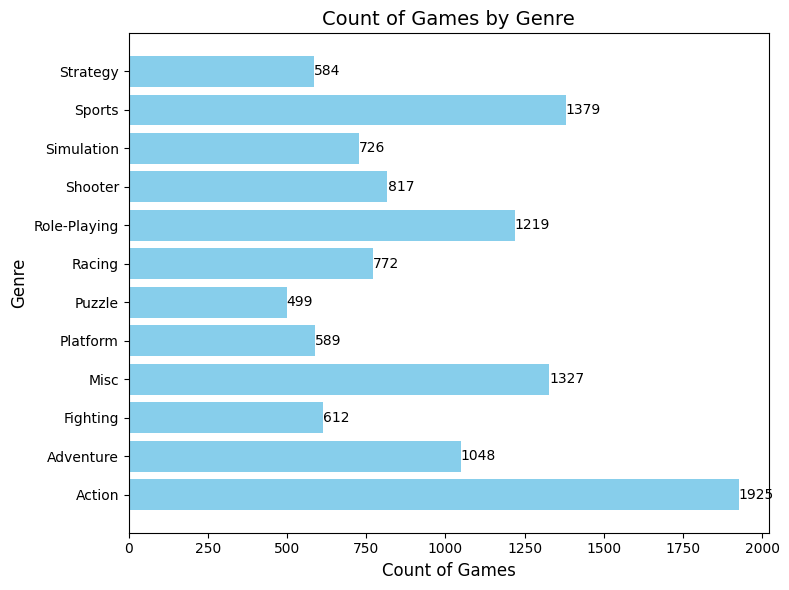

In [58]:

genres = games.index
counts = games.values

# Plot the counts with customizations
plt.figure(figsize=(8, 6))  
bars = plt.barh(genres, counts, color='skyblue')

# Add labels and title with custom font sizes
plt.xlabel('Count of Games', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Count of Games by Genre', fontsize=14)

# Add data labels on the right side of the bars
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), 
             fontsize=10, va='center', color='black')


plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [59]:
top_platforms =df['Platform'].value_counts().head()
top_platforms


Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: count, dtype: int64

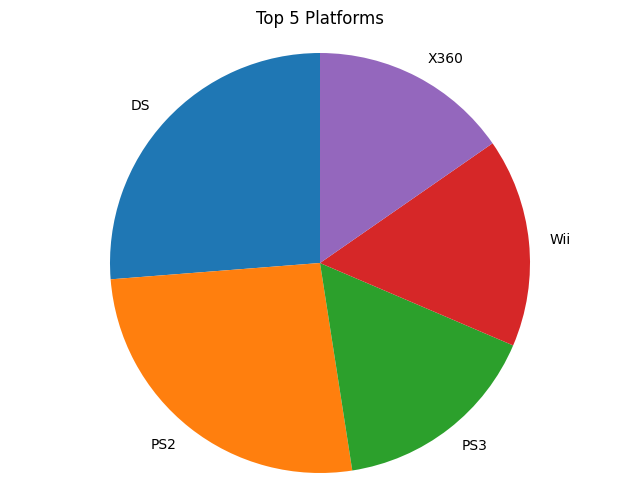

In [60]:

plt.figure(figsize=(8, 6))
plt.pie(top_platforms, labels=top_platforms.index, startangle=90)
plt.title('Top 5 Platforms')
plt.axis('equal')  
plt.show()


In [61]:
genres = df['Genre'].unique()
print("different 'Genre' available are:")
for value in genres:
    print(value)


different 'Genre' available are:
Sports
Platform
Racing
Role-Playing
Puzzle
Misc
Shooter
Simulation
Action
Fighting
Adventure
Strategy
